In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris
from sklearn.linear_model import Ridge,Lasso,ElasticNet, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')

# 다음은 다중공선성과 과적합을 해결하기 위함!!!

## 릿지 회귀(Ridge Regression) L2규제

* 릿지 회귀는 선형 회귀를 개선한 선형 모델
* 릿지 회귀는 선형 회귀와 비슷하지만, 가중치의 값을 최대한 작게 만든다는 것이 다름
* 이러한 방법은 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)를 거는 것
* 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
* 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
* 릿지 회귀는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음
* α=0이면 릿지회귀는 선형회귀와 같아지고, α가 커질수록 모든 가중치가 0에 가까워져 결국 데이터의 평균을 지나는 수평선이 된다.

\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 사용자가 지정하는 매개변수
  * $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐

In [2]:
boston = load_boston()

In [3]:
boston_df = pd.DataFrame(  boston['data'],columns=boston['feature_names'])
boston_df['MEDV'] =boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
x_data = boston_df.iloc[:,:-1]
y_data = boston_df.iloc[:,-1]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [6]:
mode_ridge = make_pipeline( StandardScaler(), Ridge() ) # 그리드서치를 이용하면 최적의 파라미터를 찾아줌
mode_ridge.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [7]:
print(mode_ridge.score(x_train, y_train))
print(mode_ridge.score(x_test, y_test))

0.7293360329044442
0.7634038058032349


In [8]:
mode_ridge5 = make_pipeline( StandardScaler(), Ridge(alpha=5) ) # 그리드서치를 이용하면 최적의 파라미터를 찾아줌
mode_ridge5.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='auto',
                       tol=0.001))],
         verbose=False)

In [9]:
print(mode_ridge5.score(x_train, y_train))
print(mode_ridge5.score(x_test, y_test))

0.7289067264142004
0.7629020804027657


In [10]:
mode_ridge10 = make_pipeline( StandardScaler(), Ridge(alpha=10) ) # 그리드서치를 이용하면 최적의 파라미터를 찾아줌
mode_ridge10.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='auto',
                       tol=0.001))],
         verbose=False)

In [11]:
print(mode_ridge10.score(x_train, y_train))
print(mode_ridge10.score(x_test, y_test))

0.7279158914928878
0.7616503886395203


## 라쏘 회귀(Lasso Regression) L1규제


* 선형 회귀에 규제를 적용한 또 다른 모델로 라쏘 회귀가 있음
* 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용

* 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}

* 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능

In [12]:
model_lasso = Lasso(alpha = 0.5)
model_lasso.fit(x_train, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
print(model_lasso.score(x_train, y_train))
print(model_lasso.score(x_test, y_test))

0.7003419060083982
0.7092912054989273


# 최적의 파라미터를 찾아주는 Grid Search

### Lasso의 최적의 파라미터 alpha를 찾아보자!

In [14]:
# alpha를 바꾸어 가면서 검증을 하는데 교차검증도 들어가 있음
# 베스트파라미터를 찾아줌!!

param_value = {'alpha':[0.0001, 0.01, 1, 2, 3, 4]} # 이 부분은 직접 입력 # 딕셔너리로!
modelLasso = Lasso()
gridSearch = GridSearchCV(modelLasso, param_grid=param_value, cv =10) # 파라미터를 딕셔너리 형태로 주기 # 디폴트는 5번 교차검정
gridSearch.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.01, 1, 2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

- alpha

In [15]:
gridSearch.best_params_

{'alpha': 0.0001}

- 결정계수

In [16]:
gridSearch.best_score_

0.6774218498018814

- 실행결과

In [17]:
gridSearch.cv_results_

{'mean_fit_time': array([0.00209317, 0.0016953 , 0.00154843, 0.00119674, 0.0013957 ,
        0.00139644]),
 'std_fit_time': array([0.00053334, 0.000457  , 0.000571  , 0.00039876, 0.00048911,
        0.00048855]),
 'mean_score_time': array([0.00099828, 0.00069835, 0.00059857, 0.00089762, 0.00079768,
        0.0008975 ]),
 'std_score_time': array([0.00044608, 0.00045718, 0.00048873, 0.00029921, 0.00039884,
        0.00029917]),
 'param_alpha': masked_array(data=[0.0001, 0.01, 1, 2, 3, 4],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.0001},
  {'alpha': 0.01},
  {'alpha': 1},
  {'alpha': 2},
  {'alpha': 3},
  {'alpha': 4}],
 'split0_test_score': array([0.86745132, 0.87159532, 0.77786625, 0.7049526 , 0.65308043,
        0.61660916]),
 'split1_test_score': array([0.538554  , 0.54065526, 0.59957882, 0.55813648, 0.52150994,
        0.47828249]),
 'split2_test_score': array([0.45805684, 0.44812811, 0.3

In [18]:
# gridSearch.best_estimator_ => 'alpha': 0.0001 인 모델 객체 반환

gridSearch.best_estimator_.predict(x_test)

array([32.65451755, 28.09425116, 18.02726711, 21.47629568, 18.82908552,
       19.88077272, 32.41998143, 18.06708964, 24.41908704, 27.00953035,
       27.03787347, 28.75393746, 21.15618569, 26.85041791, 23.38805586,
       20.66176498, 17.33031598, 38.24714047, 30.50412507,  8.74996034,
       20.80262417, 16.26920784, 25.21841717, 24.85309794, 31.38345601,
       10.71240508, 13.8046697 , 16.66025695, 36.52842352, 14.66802031,
       21.12315375, 13.95484118, 43.160864  , 17.97790542, 21.80116716,
       20.58470696, 17.60156619, 27.22266959,  9.46018155, 19.82795804,
       24.30765777, 21.18903539, 29.57143119, 16.33972352, 19.31295781,
       14.56458086, 39.20563841, 18.1096834 , 25.91031161, 20.32943949,
       25.16213668, 24.42813032, 25.07251632, 26.65826038,  4.55804761,
       24.08270516, 10.88692104, 26.89010932, 16.85748247, 35.88685368,
       19.55883708, 27.51889298, 16.58465045, 18.7722969 , 11.13779245,
       32.36427557, 36.7282874 , 21.96093821, 24.5767824 , 25.14

# 다중공선성, 과대적합

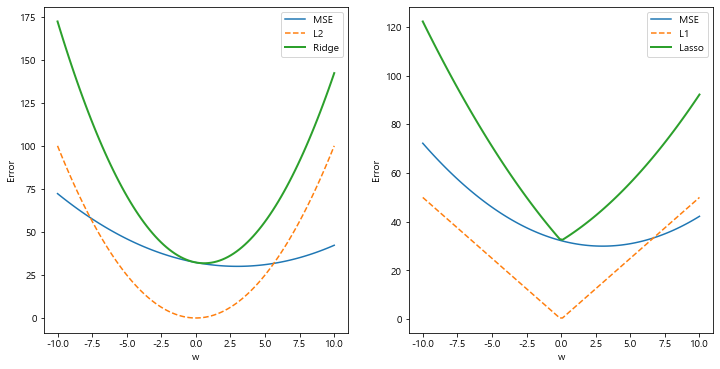

In [19]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[12,6])

rng = np.linspace(-10,10,100)
mse = ( 0.5*(rng-3) )**2 + 30
l2 = rng**2
l1 = 5*np.abs(rng)
ridge = mse + l2
lasso = mse + l1

plt.subplot(1,2,1)
plt.plot(rng,mse,label='MSE')
plt.plot(rng,l2,'--',label='L2')
plt.plot(rng,ridge, lw=2, label='Ridge')
plt.xlabel('w'); plt.ylabel('Error')
plt.legend()

plt.subplot(1,2,2)
plt.plot(rng,mse,label='MSE')
plt.plot(rng,l1,'--',label='L1')
plt.plot(rng,lasso, lw=2, label='Lasso')
plt.xlabel('w'); plt.ylabel('Error')
plt.legend()

plt.show()

# 다수의 변수 간에 상관관계가 존재할 때 효과적인 Elastic-Net

## 신축망 (Elastic-Net)

* 신축망은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
* 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
* 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 줌

* 신축망은 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 규제의 강도를 조절하는 매개변수
  + $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

In [20]:
# 알파와 p값을 정해 줘야 함

model_elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
model_elastic.fit(x_train, y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [21]:
print(model_elastic.score(x_train, y_train))
print(model_elastic.score(x_test, y_test))

0.7231027704401571
0.7639149100563347


In [22]:
param_value = {'alpha':[0.0001, 0.01, 1, 2, 3, 4], 'l1_ratio':[0.1, 0.3, 0.5, 0.7, 0.8, 0.9]} # 이 부분은 직접 입력 # 딕셔너리로!
modelElastic = ElasticNet()
# modelElastic = make_pipeline( StandardScaler(), ElasticNet() )
gridSearch = GridSearchCV(modelElastic, param_grid=param_value, cv =10) # 파라미터를 딕셔너리 형태로 주기 # 디폴트는 5번 교차검정(cv)
gridSearch.fit(x_train, y_train) # 여기는 당연히 정규화된 데이터를 줘야함

GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.01, 1, 2, 3, 4],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.8, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [23]:
gridSearch.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.1}

In [24]:
gridSearch.best_score_

0.6774792126469189

# 다항 회귀 (Polynomial Regression)

* 입력 데이터를 비선형 변환 후 사용하는 방법
* 모델 자체는 선형 모델
* 차수(차수2는 2번 곱함 x^2, 차수3은 3번 곱함 x^3)

\begin{equation}
\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_1^2 + w_5 x_2^2
\end{equation}

* 차수가 높아질수록 더 복잡한 데이터 학습 가능

![polynomial regression](https://scikit-learn.org/stable/_images/sphx_glr_plot_polynomial_interpolation_0011.png)


- 데이터가 단순한 직선의 형태가 아닌 비선형 형태여도, 선형 모델을 사용하여 비선형 데이터를 학습할 수 있음
- 이때, 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 확장된 특성을 포함한 데이터셋에 선형모델을 훈련시키는 것인데, 이러한 기법을 다항회귀

In [25]:
# degree : 차수
model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [26]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9264046957163292
0.9116244055634332


- PloynomialFeatures는 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문에 특성 간의 관계를 찾을 수 있음
- 예를 들어 특성 a, b에 대하여 degree=3으로 적용하면 a^3, a^2, b^3, b^2, ab, a^2b, ab^2을 특성으로 추가함

# NN(Neural Network) - MLPRegressor

### 데이터에 맞게끔 hidden layer를 통해 가중치를 부여
### 오버피팅의 가능성도 있음!

In [27]:
sample_size = 500
x = np.random.uniform(-20, 20, sample_size).reshape(-1, 1)
y = x**4 + x**3 + x**2 + x + np.random.normal(0, 10, sample_size).reshape(-1, 1)
print(x.shape, y.shape)

(500, 1) (500, 1)


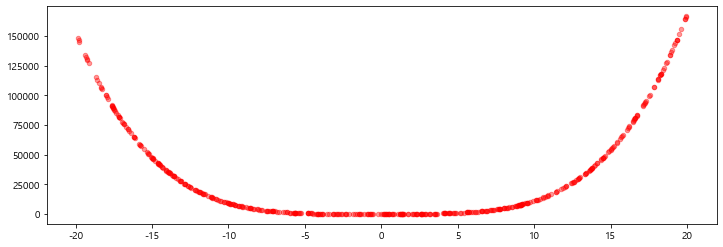

In [28]:
plt.figure(figsize=(12, 4))
plt.scatter(x, y, marker='o', s=20, alpha=0.4, c='red')
plt.show()

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    train_size =0.7, test_size=0.3)

In [30]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
model_lr.score(x_test, y_test)

-0.02718541135742547

In [31]:
modelML = MLPRegressor(hidden_layer_sizes=[1000, 4], max_iter=5000, alpha=0.005, verbose=1, random_state=1)
modelML.fit(x_train, y_train)
modelML.score(x_test, y_test)

Iteration 1, loss = 1195536672.22154093
Iteration 2, loss = 1195511817.33752275
Iteration 3, loss = 1195486471.14759970
Iteration 4, loss = 1195455591.28283763
Iteration 5, loss = 1195426992.86962271
Iteration 6, loss = 1195396068.33665705
Iteration 7, loss = 1195362790.53503728
Iteration 8, loss = 1195330170.93443990
Iteration 9, loss = 1195296408.13218689
Iteration 10, loss = 1195262022.36910129
Iteration 11, loss = 1195222959.28818154
Iteration 12, loss = 1195182866.44127965
Iteration 13, loss = 1195143351.73705673
Iteration 14, loss = 1195097992.73803711
Iteration 15, loss = 1195051602.43951440
Iteration 16, loss = 1195005298.01187158
Iteration 17, loss = 1194952204.27884412
Iteration 18, loss = 1194897658.55874634
Iteration 19, loss = 1194839517.16694236
Iteration 20, loss = 1194779866.82094622
Iteration 21, loss = 1194712803.44520497
Iteration 22, loss = 1194645175.33107066
Iteration 23, loss = 1194571622.70642805
Iteration 24, loss = 1194491433.18838024
Iteration 25, loss = 1194

Iteration 211, loss = 856568685.07292342
Iteration 212, loss = 852682964.82508767
Iteration 213, loss = 848889160.92253888
Iteration 214, loss = 844902517.92835140
Iteration 215, loss = 841096080.91676688
Iteration 216, loss = 836973500.58831322
Iteration 217, loss = 833332391.82720077
Iteration 218, loss = 829209194.62054443
Iteration 219, loss = 825242130.97651434
Iteration 220, loss = 821363786.73054373
Iteration 221, loss = 817196896.74146783
Iteration 222, loss = 813513827.69294679
Iteration 223, loss = 809477682.43567002
Iteration 224, loss = 805398374.87088156
Iteration 225, loss = 801456935.02009177
Iteration 226, loss = 797370565.52868581
Iteration 227, loss = 793467211.92394686
Iteration 228, loss = 789342849.84818602
Iteration 229, loss = 785441599.66267264
Iteration 230, loss = 781304394.15908098
Iteration 231, loss = 777505815.86650038
Iteration 232, loss = 773251470.43336344
Iteration 233, loss = 769321792.52392769
Iteration 234, loss = 765234954.22021699
Iteration 235, l

Iteration 424, loss = 337564992.60276121
Iteration 425, loss = 337258412.05233043
Iteration 426, loss = 336968595.53659892
Iteration 427, loss = 336610287.14189959
Iteration 428, loss = 336391893.73239911
Iteration 429, loss = 336103283.78787649
Iteration 430, loss = 335834554.31198031
Iteration 431, loss = 335534578.39988840
Iteration 432, loss = 335247180.21671236
Iteration 433, loss = 335063183.68914479
Iteration 434, loss = 334773510.22069949
Iteration 435, loss = 334581316.65477741
Iteration 436, loss = 334302221.00548059
Iteration 437, loss = 334031576.12477934
Iteration 438, loss = 333848603.65932035
Iteration 439, loss = 333572627.01428831
Iteration 440, loss = 333440703.61705136
Iteration 441, loss = 333193007.87520069
Iteration 442, loss = 332986563.39015430
Iteration 443, loss = 332791358.79290557
Iteration 444, loss = 332551125.95302659
Iteration 445, loss = 332367388.73263556
Iteration 446, loss = 332170827.07047373
Iteration 447, loss = 331993289.33883083
Iteration 448, l

Iteration 637, loss = 317048787.73745900
Iteration 638, loss = 317000732.33790708
Iteration 639, loss = 316943016.94426203
Iteration 640, loss = 316893361.50899100
Iteration 641, loss = 316836434.66113824
Iteration 642, loss = 316791043.60183078
Iteration 643, loss = 316733351.90205359
Iteration 644, loss = 316684510.46430933
Iteration 645, loss = 316630157.63337368
Iteration 646, loss = 316578840.99070048
Iteration 647, loss = 316527742.69276208
Iteration 648, loss = 316474842.64838725
Iteration 649, loss = 316423842.61882114
Iteration 650, loss = 316378409.12371683
Iteration 651, loss = 316336689.80270326
Iteration 652, loss = 316276706.29824471
Iteration 653, loss = 316219644.46569067
Iteration 654, loss = 316170257.28154516
Iteration 655, loss = 316118758.52250123
Iteration 656, loss = 316065259.82151657
Iteration 657, loss = 316031246.78933400
Iteration 658, loss = 315986754.69277996
Iteration 659, loss = 315914439.76861322
Iteration 660, loss = 315865655.98577064
Iteration 661, l

Iteration 847, loss = 306990170.51600289
Iteration 848, loss = 306954978.99531078
Iteration 849, loss = 306914052.38408202
Iteration 850, loss = 306853538.87917864
Iteration 851, loss = 306811083.22672260
Iteration 852, loss = 306767863.67153949
Iteration 853, loss = 306727879.11865669
Iteration 854, loss = 306678111.63218594
Iteration 855, loss = 306633109.26163590
Iteration 856, loss = 306592051.46835411
Iteration 857, loss = 306542604.47605735
Iteration 858, loss = 306498506.46232027
Iteration 859, loss = 306452675.77251023
Iteration 860, loss = 306411025.96289659
Iteration 861, loss = 306361395.86173904
Iteration 862, loss = 306315668.24167514
Iteration 863, loss = 306281420.65153104
Iteration 864, loss = 306227951.46209693
Iteration 865, loss = 306183184.42763513
Iteration 866, loss = 306143172.37717116
Iteration 867, loss = 306100006.52069747
Iteration 868, loss = 306045652.86139053
Iteration 869, loss = 306003427.24730474
Iteration 870, loss = 305961489.50843787
Iteration 871, l

Iteration 1063, loss = 297497854.14150268
Iteration 1064, loss = 297443428.56775808
Iteration 1065, loss = 297400197.97732204
Iteration 1066, loss = 297380387.88465792
Iteration 1067, loss = 297313375.12298524
Iteration 1068, loss = 297273733.75614965
Iteration 1069, loss = 297227224.17442530
Iteration 1070, loss = 297183752.41659814
Iteration 1071, loss = 297143578.02472168
Iteration 1072, loss = 297099730.99466062
Iteration 1073, loss = 297065994.93053806
Iteration 1074, loss = 297014952.61244994
Iteration 1075, loss = 296971057.46772295
Iteration 1076, loss = 296927328.69619286
Iteration 1077, loss = 296885054.46454984
Iteration 1078, loss = 296838148.65834272
Iteration 1079, loss = 296797401.87024581
Iteration 1080, loss = 296753744.00724864
Iteration 1081, loss = 296707209.84533787
Iteration 1082, loss = 296667910.17766732
Iteration 1083, loss = 296632936.18460011
Iteration 1084, loss = 296588407.58409208
Iteration 1085, loss = 296540950.16612023
Iteration 1086, loss = 296494047.6

Iteration 1260, loss = 288945813.94827330
Iteration 1261, loss = 288879205.46168143
Iteration 1262, loss = 288837795.90017945
Iteration 1263, loss = 288791396.83723724
Iteration 1264, loss = 288757069.82591385
Iteration 1265, loss = 288703906.28745937
Iteration 1266, loss = 288661791.44758093
Iteration 1267, loss = 288617301.97432435
Iteration 1268, loss = 288579956.43494862
Iteration 1269, loss = 288526692.22567028
Iteration 1270, loss = 288488745.16012013
Iteration 1271, loss = 288441042.83489120
Iteration 1272, loss = 288400136.74858886
Iteration 1273, loss = 288351380.38933402
Iteration 1274, loss = 288309701.27693117
Iteration 1275, loss = 288259082.90404910
Iteration 1276, loss = 288214107.85807973
Iteration 1277, loss = 288173700.92206621
Iteration 1278, loss = 288139497.51703650
Iteration 1279, loss = 288082497.35564810
Iteration 1280, loss = 288046237.27495259
Iteration 1281, loss = 287996287.55183148
Iteration 1282, loss = 287960448.82048190
Iteration 1283, loss = 287904400.5

Iteration 1460, loss = 279795387.79274875
Iteration 1461, loss = 279740067.02813029
Iteration 1462, loss = 279692268.44211698
Iteration 1463, loss = 279654786.92509562
Iteration 1464, loss = 279599466.29117900
Iteration 1465, loss = 279552197.28905588
Iteration 1466, loss = 279504846.97859114
Iteration 1467, loss = 279458871.82989252
Iteration 1468, loss = 279411373.29391158
Iteration 1469, loss = 279362457.91970754
Iteration 1470, loss = 279328224.97349590
Iteration 1471, loss = 279265312.50769359
Iteration 1472, loss = 279215871.49468952
Iteration 1473, loss = 279168800.86819971
Iteration 1474, loss = 279123502.03774434
Iteration 1475, loss = 279074703.00840461
Iteration 1476, loss = 279025275.86438084
Iteration 1477, loss = 278986169.55648971
Iteration 1478, loss = 278932106.76999313
Iteration 1479, loss = 278888816.68469954
Iteration 1480, loss = 278857208.77361089
Iteration 1481, loss = 278789718.73591763
Iteration 1482, loss = 278770101.59401453
Iteration 1483, loss = 278688743.0

Iteration 1659, loss = 269771238.13356853
Iteration 1660, loss = 269712563.85201877
Iteration 1661, loss = 269669813.24258161
Iteration 1662, loss = 269614014.70235473
Iteration 1663, loss = 269558659.83915263
Iteration 1664, loss = 269499635.93878913
Iteration 1665, loss = 269452982.05479831
Iteration 1666, loss = 269407635.11524910
Iteration 1667, loss = 269344812.64597875
Iteration 1668, loss = 269279517.01435494
Iteration 1669, loss = 269226980.75860584
Iteration 1670, loss = 269175044.74944705
Iteration 1671, loss = 269117689.78078979
Iteration 1672, loss = 269070900.08823705
Iteration 1673, loss = 269031120.94261789
Iteration 1674, loss = 268978578.43675888
Iteration 1675, loss = 268903813.55771798
Iteration 1676, loss = 268846914.10623747
Iteration 1677, loss = 268792519.93077958
Iteration 1678, loss = 268757246.97811830
Iteration 1679, loss = 268687292.41508913
Iteration 1680, loss = 268656962.63858527
Iteration 1681, loss = 268580597.67592144
Iteration 1682, loss = 268525134.0

Iteration 1866, loss = 257646162.71630767
Iteration 1867, loss = 257559534.87007803
Iteration 1868, loss = 257486008.69530839
Iteration 1869, loss = 257416993.17542136
Iteration 1870, loss = 257359748.17450318
Iteration 1871, loss = 257288735.90908098
Iteration 1872, loss = 257226213.72338107
Iteration 1873, loss = 257163312.09802192
Iteration 1874, loss = 257099673.75955805
Iteration 1875, loss = 257037188.99090531
Iteration 1876, loss = 256970242.84300983
Iteration 1877, loss = 256899541.58664656
Iteration 1878, loss = 256843140.21632734
Iteration 1879, loss = 256773741.44189048
Iteration 1880, loss = 256717373.58163583
Iteration 1881, loss = 256639057.89103150
Iteration 1882, loss = 256575665.02942070
Iteration 1883, loss = 256532229.65789977
Iteration 1884, loss = 256451100.37019289
Iteration 1885, loss = 256383147.82112017
Iteration 1886, loss = 256324181.60855374
Iteration 1887, loss = 256282223.35591656
Iteration 1888, loss = 256184954.74517936
Iteration 1889, loss = 256121250.9

Iteration 2065, loss = 243308030.12158465
Iteration 2066, loss = 243248363.88028407
Iteration 2067, loss = 243147613.61254051
Iteration 2068, loss = 243069466.26118523
Iteration 2069, loss = 242993370.36864883
Iteration 2070, loss = 242932103.43615061
Iteration 2071, loss = 242836005.58576992
Iteration 2072, loss = 242744728.06940272
Iteration 2073, loss = 242681177.34031105
Iteration 2074, loss = 242596213.28388479
Iteration 2075, loss = 242501972.95091578
Iteration 2076, loss = 242435725.47280204
Iteration 2077, loss = 242346205.50848565
Iteration 2078, loss = 242261900.31491321
Iteration 2079, loss = 242178807.36747563
Iteration 2080, loss = 242099837.31157252
Iteration 2081, loss = 242019411.94980747
Iteration 2082, loss = 241938410.69202876
Iteration 2083, loss = 241873556.50063482
Iteration 2084, loss = 241788481.73135284
Iteration 2085, loss = 241695302.89062360
Iteration 2086, loss = 241620313.17879343
Iteration 2087, loss = 241537976.65869543
Iteration 2088, loss = 241465513.9

Iteration 2262, loss = 225624297.30544570
Iteration 2263, loss = 225527057.35979894
Iteration 2264, loss = 225416388.32935020
Iteration 2265, loss = 225321307.06295666
Iteration 2266, loss = 225215325.52001899
Iteration 2267, loss = 225124016.43323863
Iteration 2268, loss = 225010037.49139693
Iteration 2269, loss = 224915507.72109213
Iteration 2270, loss = 224810308.95724198
Iteration 2271, loss = 224716328.27381486
Iteration 2272, loss = 224621006.23047665
Iteration 2273, loss = 224513442.56503382
Iteration 2274, loss = 224404183.19906050
Iteration 2275, loss = 224301091.92183819
Iteration 2276, loss = 224221262.01457167
Iteration 2277, loss = 224104570.02425477
Iteration 2278, loss = 223995011.06196305
Iteration 2279, loss = 223891228.41147614
Iteration 2280, loss = 223794555.31166607
Iteration 2281, loss = 223695458.49608564
Iteration 2282, loss = 223578792.20708382
Iteration 2283, loss = 223479721.77342340
Iteration 2284, loss = 223384189.74449658
Iteration 2285, loss = 223283814.8

Iteration 2462, loss = 202938070.08240885
Iteration 2463, loss = 202806927.82595363
Iteration 2464, loss = 202689616.10481367
Iteration 2465, loss = 202549039.31606817
Iteration 2466, loss = 202435669.68065283
Iteration 2467, loss = 202294746.84436688
Iteration 2468, loss = 202181269.51019815
Iteration 2469, loss = 202063878.42614004
Iteration 2470, loss = 201908593.31005001
Iteration 2471, loss = 201789890.01695311
Iteration 2472, loss = 201688059.30700859
Iteration 2473, loss = 201527461.32464448
Iteration 2474, loss = 201414630.55214792
Iteration 2475, loss = 201292964.46080613
Iteration 2476, loss = 201149711.69492650
Iteration 2477, loss = 201021340.77847579
Iteration 2478, loss = 200912915.22861242
Iteration 2479, loss = 200769494.82663196
Iteration 2480, loss = 200634205.34830284
Iteration 2481, loss = 200504227.99025592
Iteration 2482, loss = 200383285.25950593
Iteration 2483, loss = 200250251.58655387
Iteration 2484, loss = 200121972.26494232
Iteration 2485, loss = 199991852.5

Iteration 2665, loss = 174886006.21087316
Iteration 2666, loss = 174728202.62369612
Iteration 2667, loss = 174566165.69482490
Iteration 2668, loss = 174425065.88428584
Iteration 2669, loss = 174275011.40606135
Iteration 2670, loss = 174144401.15106383
Iteration 2671, loss = 173984378.56766096
Iteration 2672, loss = 173841145.31865916
Iteration 2673, loss = 173675631.98692700
Iteration 2674, loss = 173557953.26605693
Iteration 2675, loss = 173376260.54750201
Iteration 2676, loss = 173243705.21597943
Iteration 2677, loss = 173110653.32029501
Iteration 2678, loss = 172947758.94741255
Iteration 2679, loss = 172774430.41222072
Iteration 2680, loss = 172647465.83198714
Iteration 2681, loss = 172499270.40569741
Iteration 2682, loss = 172352865.69439405
Iteration 2683, loss = 172192843.38083848
Iteration 2684, loss = 172041105.80411103
Iteration 2685, loss = 171893549.12806335
Iteration 2686, loss = 171732097.86257938
Iteration 2687, loss = 171580658.87280983
Iteration 2688, loss = 171432165.1

Iteration 2870, loss = 143179442.99072099
Iteration 2871, loss = 143020645.21277705
Iteration 2872, loss = 142859680.93412971
Iteration 2873, loss = 142701495.93639961
Iteration 2874, loss = 142556734.86822218
Iteration 2875, loss = 142401368.94522709
Iteration 2876, loss = 142229709.50364301
Iteration 2877, loss = 142091261.03671631
Iteration 2878, loss = 141914315.70542529
Iteration 2879, loss = 141778570.95647207
Iteration 2880, loss = 141588094.30350307
Iteration 2881, loss = 141454397.23577413
Iteration 2882, loss = 141284508.95054352
Iteration 2883, loss = 141132326.61521590
Iteration 2884, loss = 140972010.81031984
Iteration 2885, loss = 140814080.71635994
Iteration 2886, loss = 140652978.63506696
Iteration 2887, loss = 140508517.04483664
Iteration 2888, loss = 140345528.31173742
Iteration 2889, loss = 140190826.14563182
Iteration 2890, loss = 140047529.82624447
Iteration 2891, loss = 139881448.47622699
Iteration 2892, loss = 139709938.88985002
Iteration 2893, loss = 139555529.6

Iteration 3083, loss = 110944958.83350198
Iteration 3084, loss = 110817054.29680392
Iteration 3085, loss = 110662208.30859993
Iteration 3086, loss = 110519477.25338688
Iteration 3087, loss = 110386836.59148397
Iteration 3088, loss = 110248377.56071422
Iteration 3089, loss = 110094209.22897731
Iteration 3090, loss = 109963278.61522308
Iteration 3091, loss = 109829700.14129469
Iteration 3092, loss = 109669145.01804033
Iteration 3093, loss = 109533967.30917807
Iteration 3094, loss = 109395068.44871673
Iteration 3095, loss = 109267576.73321429
Iteration 3096, loss = 109114047.04334697
Iteration 3097, loss = 108984341.79803500
Iteration 3098, loss = 108826207.00700462
Iteration 3099, loss = 108727068.30688593
Iteration 3100, loss = 108550934.24178249
Iteration 3101, loss = 108417014.14817928
Iteration 3102, loss = 108281761.64907490
Iteration 3103, loss = 108143765.73878554
Iteration 3104, loss = 107992792.14400925
Iteration 3105, loss = 107857400.22685505
Iteration 3106, loss = 107726897.7

Iteration 3297, loss = 83844928.73677765
Iteration 3298, loss = 83728912.06884126
Iteration 3299, loss = 83623922.89679964
Iteration 3300, loss = 83506435.61798087
Iteration 3301, loss = 83400783.07640338
Iteration 3302, loss = 83284326.47264980
Iteration 3303, loss = 83184051.83616164
Iteration 3304, loss = 83092892.83042045
Iteration 3305, loss = 82961961.16589272
Iteration 3306, loss = 82859245.45858827
Iteration 3307, loss = 82744634.88063012
Iteration 3308, loss = 82633852.81816798
Iteration 3309, loss = 82538485.50508884
Iteration 3310, loss = 82415271.45860393
Iteration 3311, loss = 82302579.74666084
Iteration 3312, loss = 82206293.33875495
Iteration 3313, loss = 82087827.11119853
Iteration 3314, loss = 81986606.70583168
Iteration 3315, loss = 81872191.08066049
Iteration 3316, loss = 81768785.27031265
Iteration 3317, loss = 81680042.10312419
Iteration 3318, loss = 81545085.71393348
Iteration 3319, loss = 81433636.58359966
Iteration 3320, loss = 81343329.98797533
Iteration 3321, 

Iteration 3514, loss = 63348196.97225381
Iteration 3515, loss = 63306015.08220420
Iteration 3516, loss = 63201424.25270565
Iteration 3517, loss = 63116438.75086865
Iteration 3518, loss = 63034573.90723483
Iteration 3519, loss = 62955434.64991666
Iteration 3520, loss = 62874655.90829974
Iteration 3521, loss = 62801371.80789500
Iteration 3522, loss = 62713181.67061010
Iteration 3523, loss = 62636069.90341691
Iteration 3524, loss = 62570110.50331702
Iteration 3525, loss = 62477883.42935428
Iteration 3526, loss = 62412352.43101200
Iteration 3527, loss = 62330628.06683762
Iteration 3528, loss = 62244630.04297908
Iteration 3529, loss = 62166939.98363421
Iteration 3530, loss = 62087523.79252932
Iteration 3531, loss = 62034324.15162818
Iteration 3532, loss = 61943565.45113182
Iteration 3533, loss = 61868784.75124642
Iteration 3534, loss = 61784807.34436335
Iteration 3535, loss = 61727278.77416493
Iteration 3536, loss = 61635633.49858993
Iteration 3537, loss = 61555150.68208640
Iteration 3538, 

Iteration 3726, loss = 48764985.18178780
Iteration 3727, loss = 48697951.15027751
Iteration 3728, loss = 48631554.90028548
Iteration 3729, loss = 48578659.61188694
Iteration 3730, loss = 48518784.45885401
Iteration 3731, loss = 48455326.28889027
Iteration 3732, loss = 48392049.44404338
Iteration 3733, loss = 48341004.47977696
Iteration 3734, loss = 48270349.31567260
Iteration 3735, loss = 48207577.31595392
Iteration 3736, loss = 48137883.04873192
Iteration 3737, loss = 48092859.74908908
Iteration 3738, loss = 48020199.71236701
Iteration 3739, loss = 47957216.54500903
Iteration 3740, loss = 47893778.16191474
Iteration 3741, loss = 47837132.55933442
Iteration 3742, loss = 47782232.24989112
Iteration 3743, loss = 47731074.23614156
Iteration 3744, loss = 47653208.15533910
Iteration 3745, loss = 47592200.49026941
Iteration 3746, loss = 47528480.94252057
Iteration 3747, loss = 47465189.37164754
Iteration 3748, loss = 47400745.99535695
Iteration 3749, loss = 47367365.63407689
Iteration 3750, 

Iteration 3941, loss = 36314287.04282092
Iteration 3942, loss = 36267164.69734319
Iteration 3943, loss = 36211578.75266013
Iteration 3944, loss = 36172120.96672892
Iteration 3945, loss = 36129786.77745570
Iteration 3946, loss = 36077272.33151171
Iteration 3947, loss = 36000905.20149132
Iteration 3948, loss = 35959184.34214889
Iteration 3949, loss = 35887701.01245562
Iteration 3950, loss = 35842713.81048787
Iteration 3951, loss = 35794203.61497463
Iteration 3952, loss = 35755581.95530181
Iteration 3953, loss = 35689034.99845953
Iteration 3954, loss = 35641685.20900361
Iteration 3955, loss = 35582052.76212742
Iteration 3956, loss = 35536471.15364777
Iteration 3957, loss = 35479440.81929196
Iteration 3958, loss = 35429258.30411568
Iteration 3959, loss = 35392983.89383008
Iteration 3960, loss = 35329188.50149669
Iteration 3961, loss = 35271134.76299674
Iteration 3962, loss = 35229966.51711743
Iteration 3963, loss = 35161309.61352991
Iteration 3964, loss = 35116450.41463018
Iteration 3965, 

Iteration 4142, loss = 26588603.45166847
Iteration 4143, loss = 26540640.51666229
Iteration 4144, loss = 26504729.02590302
Iteration 4145, loss = 26462764.54884185
Iteration 4146, loss = 26441779.06319129
Iteration 4147, loss = 26388969.30817457
Iteration 4148, loss = 26369217.22216730
Iteration 4149, loss = 26301399.04190556
Iteration 4150, loss = 26259652.28036520
Iteration 4151, loss = 26213538.84701133
Iteration 4152, loss = 26174691.70422101
Iteration 4153, loss = 26128152.07593698
Iteration 4154, loss = 26074855.39364627
Iteration 4155, loss = 26054004.54761034
Iteration 4156, loss = 26006538.24925770
Iteration 4157, loss = 25964650.08966833
Iteration 4158, loss = 25909259.36973583
Iteration 4159, loss = 25869988.24699254
Iteration 4160, loss = 25823070.09514634
Iteration 4161, loss = 25792798.57207325
Iteration 4162, loss = 25739790.87459064
Iteration 4163, loss = 25717886.45224611
Iteration 4164, loss = 25663612.97186850
Iteration 4165, loss = 25654482.01088135
Iteration 4166, 

Iteration 4342, loss = 18994592.36267343
Iteration 4343, loss = 18952218.00148849
Iteration 4344, loss = 18929250.95788218
Iteration 4345, loss = 18888378.89107663
Iteration 4346, loss = 18873024.85265910
Iteration 4347, loss = 18827856.42674899
Iteration 4348, loss = 18789010.88052668
Iteration 4349, loss = 18763277.94759950
Iteration 4350, loss = 18731054.59955580
Iteration 4351, loss = 18701854.90900480
Iteration 4352, loss = 18663968.39601922
Iteration 4353, loss = 18659085.94751318
Iteration 4354, loss = 18596403.63014587
Iteration 4355, loss = 18568164.17984467
Iteration 4356, loss = 18543101.35913518
Iteration 4357, loss = 18515891.97250668
Iteration 4358, loss = 18469700.50557837
Iteration 4359, loss = 18461200.34293713
Iteration 4360, loss = 18407991.99862614
Iteration 4361, loss = 18375867.29714083
Iteration 4362, loss = 18343452.39994512
Iteration 4363, loss = 18315967.94762729
Iteration 4364, loss = 18281202.88769334
Iteration 4365, loss = 18246816.36560878
Iteration 4366, 

Iteration 4547, loss = 13339219.02534171
Iteration 4548, loss = 13319672.42605997
Iteration 4549, loss = 13293534.06736343
Iteration 4550, loss = 13290368.20395341
Iteration 4551, loss = 13253512.61104259
Iteration 4552, loss = 13233951.06936961
Iteration 4553, loss = 13214203.22212832
Iteration 4554, loss = 13186348.51997520
Iteration 4555, loss = 13163784.18208089
Iteration 4556, loss = 13144621.08488772
Iteration 4557, loss = 13115010.89358705
Iteration 4558, loss = 13107297.97364277
Iteration 4559, loss = 13082180.92560668
Iteration 4560, loss = 13047852.07431150
Iteration 4561, loss = 13027641.39870372
Iteration 4562, loss = 13012679.56993938
Iteration 4563, loss = 12988157.35411867
Iteration 4564, loss = 12969875.34810495
Iteration 4565, loss = 12936575.92773265
Iteration 4566, loss = 12938681.58320618
Iteration 4567, loss = 12923818.86137979
Iteration 4568, loss = 12878865.35029070
Iteration 4569, loss = 12861163.96225993
Iteration 4570, loss = 12834082.04039717
Iteration 4571, 

Iteration 4748, loss = 9551856.12105409
Iteration 4749, loss = 9533604.66284837
Iteration 4750, loss = 9513539.37617425
Iteration 4751, loss = 9498041.26242083
Iteration 4752, loss = 9487421.21433225
Iteration 4753, loss = 9466819.78160768
Iteration 4754, loss = 9465049.13306773
Iteration 4755, loss = 9442434.67993956
Iteration 4756, loss = 9431014.76865297
Iteration 4757, loss = 9425746.42424253
Iteration 4758, loss = 9401031.40217114
Iteration 4759, loss = 9380833.72501055
Iteration 4760, loss = 9372264.74132001
Iteration 4761, loss = 9349668.58674189
Iteration 4762, loss = 9340648.98605267
Iteration 4763, loss = 9322648.02019153
Iteration 4764, loss = 9307054.62771140
Iteration 4765, loss = 9296288.94361070
Iteration 4766, loss = 9270260.91402763
Iteration 4767, loss = 9276327.62196304
Iteration 4768, loss = 9260666.44331005
Iteration 4769, loss = 9228081.92066566
Iteration 4770, loss = 9210838.16302171
Iteration 4771, loss = 9201410.99576188
Iteration 4772, loss = 9183084.98811275


Iteration 4968, loss = 6822763.97769317
Iteration 4969, loss = 6822175.54165459
Iteration 4970, loss = 6819224.24621946
Iteration 4971, loss = 6794962.41204718
Iteration 4972, loss = 6786836.36856241
Iteration 4973, loss = 6779762.64990611
Iteration 4974, loss = 6767600.16544263
Iteration 4975, loss = 6752680.13412708
Iteration 4976, loss = 6744906.67045249
Iteration 4977, loss = 6749457.59797582
Iteration 4978, loss = 6729128.15813367
Iteration 4979, loss = 6718550.21084229
Iteration 4980, loss = 6705219.02691713
Iteration 4981, loss = 6720311.75402442
Iteration 4982, loss = 6686316.06593323
Iteration 4983, loss = 6683040.51767592
Iteration 4984, loss = 6668345.19970506
Iteration 4985, loss = 6679078.69857960
Iteration 4986, loss = 6647557.86552460
Iteration 4987, loss = 6646605.95281479
Iteration 4988, loss = 6628847.39497176
Iteration 4989, loss = 6631640.74767834
Iteration 4990, loss = 6615363.35596730
Iteration 4991, loss = 6618661.21214438
Iteration 4992, loss = 6599168.15800597


0.9905662005912342

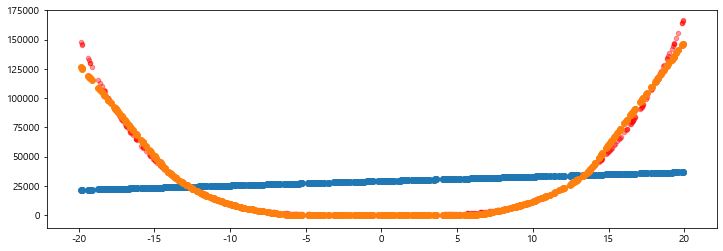

In [32]:
plt.figure(figsize=(12, 4))
plt.scatter(x, y, marker='o', s=20, alpha=0.4, c='red')
plt.scatter(x, model_lr.predict(x))
plt.scatter(x, modelML.predict(x))
plt.show()

# NN이 제일 많이 쓰임

In [34]:
from sklearn.metrics import r2_score

In [35]:
models = [
    LinearRegression(), 
    MLPRegressor(hidden_layer_sizes=[512, 4], alpha=0.005, random_state=42),
    MLPRegressor(hidden_layer_sizes=[48, 4], max_iter=5000, alpha=0.005, random_state=42), 
    MLPRegressor(hidden_layer_sizes=[512, 4], max_iter=5000, alpha=0.005, random_state=42), 
    MLPRegressor(hidden_layer_sizes=[1024, 4], max_iter=5000, alpha=0.005, random_state=42),
    MLPRegressor(hidden_layer_sizes=[1024, 512, 4], max_iter=5000, alpha=0.005, random_state=42),
]

for m in models:
    m.fit(x_train, y_train)
    print(m.__class__)
    print(r2_score(y_train, m.predict(x_train)))
    print(r2_score(y_test, m.predict(x_test)))

<class 'sklearn.linear_model._base.LinearRegression'>
0.011896996792401637
-0.02718541135742547
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
-0.33754539920215865
-0.5052838401315389
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
0.6370684368247492
0.6310571583767046
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
0.9338464545603923
0.9242516710252281
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
0.9922893049725828
0.9914962244574835
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
0.9997054163329909
0.9996781437483641


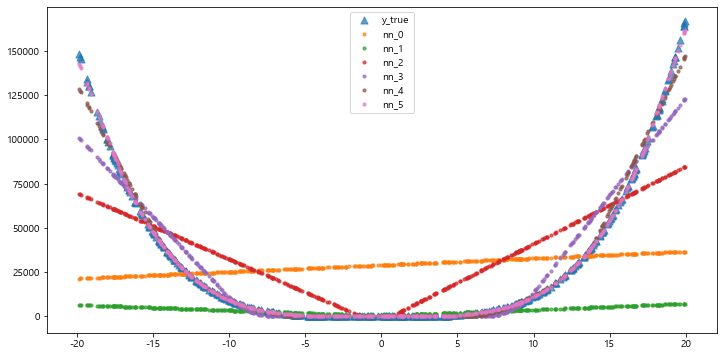

In [36]:
plt.figure(figsize=(12, 6))
plt.scatter(x, y, marker='^', s=50, alpha=0.7, label='y_true')
for i, m in enumerate(models):
    plt.scatter(x, m.predict(x), marker='o', s=10, alpha=0.7, label='nn_{}'.format(i))
plt.legend()
plt.savefig('scatter.svg')
plt.show()